<a href="https://colab.research.google.com/github/AlexKEKW/Projeto-BigData/blob/main/AtvdFinalBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando o Pyspark

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

# Inicializar Spark Session
spark = SparkSession.builder.appName("BigDataAssignment").getOrCreate()

# Carregar os datasets
df_vitimas = spark.read.csv("/content/indicadoressegurancapublicauf - Vítimas.csv", header=True, inferSchema=True)
df_ocorrencias = spark.read.csv("/content/indicadoressegurancapublicauf - Ocorrências.csv", header=True, inferSchema=True)

# Mostrar os esquemas dos dataframes carregados
df_vitimas.printSchema()
df_ocorrencias.printSchema()

root
 |-- UF: string (nullable = true)
 |-- Tipo Crime: string (nullable = true)
 |-- Ano: integer (nullable = true)
 |-- Mês: string (nullable = true)
 |-- Sexo da Vítima: string (nullable = true)
 |-- Vítimas: integer (nullable = true)

root
 |-- UF: string (nullable = true)
 |-- Tipo Crime: string (nullable = true)
 |-- Ano: integer (nullable = true)
 |-- Mês: string (nullable = true)
 |-- Ocorrências: integer (nullable = true)



In [ ]:
# Renomear colunas com acentos
df_vitimas = df_vitimas.withColumnRenamed("Vítimas", "Vitimas")
df_ocorrencias = df_ocorrencias.withColumnRenamed("Ocorrências", "Ocorrencias")

Realizando a limpeza dos dados:

In [ ]:
# Verificar e converter colunas para os tipos apropriados
df_vitimas = df_vitimas.withColumn("Vitimas", df_vitimas["Vitimas"].cast("integer"))
df_ocorrencias = df_ocorrencias.withColumn("Ocorrencias", df_ocorrencias["Ocorrencias"].cast("integer"))

# Remover linhas onde Vitimas ou Ocorrencias são nulos ou zero
df_vitimas = df_vitimas.filter(df_vitimas["Vitimas"].isNotNull() & (df_vitimas["Vitimas"] > 0))
df_ocorrencias = df_ocorrencias.filter(df_ocorrencias["Ocorrencias"].isNotNull() & (df_ocorrencias["Ocorrencias"] > 0))

In [ ]:
from pyspark.sql.functions import col, expr

# Adicionar novas colunas derivadas (exemplo)
df_vitimas = df_vitimas.withColumn("Vitimas_Dobradas", expr("Vitimas * 2"))
df_ocorrencias = df_ocorrencias.withColumn("Ocorrencias_Dobradas", expr("Ocorrencias * 2"))

# Filtragem de dados
df_vitimas_filtered = df_vitimas.filter(col("Vitimas") > 0)
df_ocorrencias_filtered = df_ocorrencias.filter(col("Ocorrencias") > 0)

# Mostrar alguns registros filtrados
df_vitimas_filtered.show(5)
df_ocorrencias_filtered.show(5)

+----+----------------+----+---------+--------------+-------+----------------+
|  UF|      Tipo Crime| Ano|      Mês|Sexo da Vítima|Vitimas|Vitimas_Dobradas|
+----+----------------+----+---------+--------------+-------+----------------+
|Acre|Homicídio doloso|2022|  janeiro|      Feminino|      2|               4|
|Acre|Homicídio doloso|2022|  janeiro|     Masculino|      8|              16|
|Acre|Homicídio doloso|2022|fevereiro|     Masculino|     10|              20|
|Acre|Homicídio doloso|2022|    março|      Feminino|      2|               4|
|Acre|Homicídio doloso|2022|    março|     Masculino|     19|              38|
+----+----------------+----+---------+--------------+-------+----------------+
only showing top 5 rows

+----+--------------------+----+-------+-----------+--------------------+
|  UF|          Tipo Crime| Ano|    Mês|Ocorrencias|Ocorrencias_Dobradas|
+----+--------------------+----+-------+-----------+--------------------+
|Acre|             Estupro|2022|janeiro|  

In [ ]:
# Estatísticas descritivas
df_vitimas.describe().show()
df_ocorrencias.describe().show()


+-------+---------+--------------------+------------------+--------+--------------+-----------------+-----------------+
|summary|       UF|          Tipo Crime|               Ano|     Mês|Sexo da Vítima|          Vitimas| Vitimas_Dobradas|
+-------+---------+--------------------+------------------+--------+--------------+-----------------+-----------------+
|  count|    11239|               11239|             11239|   11239|         11239|            11239|            11239|
|   mean|     NULL|                NULL| 2018.465966723018|    NULL|          NULL|34.29112910401281|68.58225820802562|
| stddev|     NULL|                NULL|2.2616043572429394|    NULL|          NULL|74.70169627506645|149.4033925501329|
|    min|     Acre|    Homicídio doloso|              2015|   abril|      Feminino|                1|                2|
|    max|Tocantins|Roubo seguido de ...|              2022|setembro|       Sexo NI|              580|             1160|
+-------+---------+--------------------+

In [ ]:
# Agrupamento e agregação
df_vitimas_grouped = df_vitimas.groupBy("UF").sum("Vitimas")
df_ocorrencias_grouped = df_ocorrencias.groupBy("UF").sum("Ocorrencias")

# Mostrar agrupamentos
df_vitimas_grouped.show(5)
df_ocorrencias_grouped.show(5)

+------------------+------------+
|                UF|sum(Vitimas)|
+------------------+------------+
|    Santa Catarina|        6600|
|Mato Grosso do Sul|        4406|
|             Goiás|       15977|
|       Mato Grosso|        7907|
|             Ceará|       29583|
+------------------+------------+
only showing top 5 rows

+------------------+----------------+
|                UF|sum(Ocorrencias)|
+------------------+----------------+
|    Santa Catarina|          127836|
|Mato Grosso do Sul|           57158|
|             Goiás|          168116|
|       Mato Grosso|           68665|
|             Ceará|          159694|
+------------------+----------------+
only showing top 5 rows



# Visualização de Dados

Total de Vítimas e Ocorrências por UF

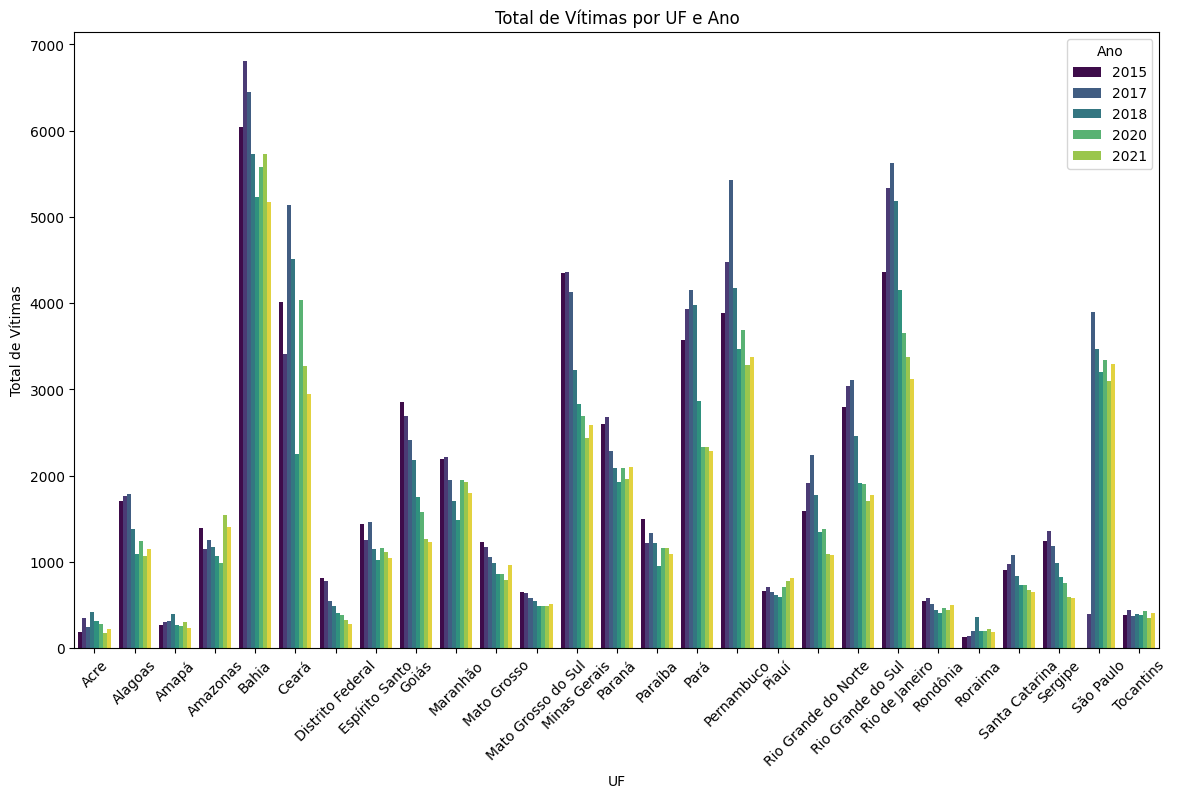

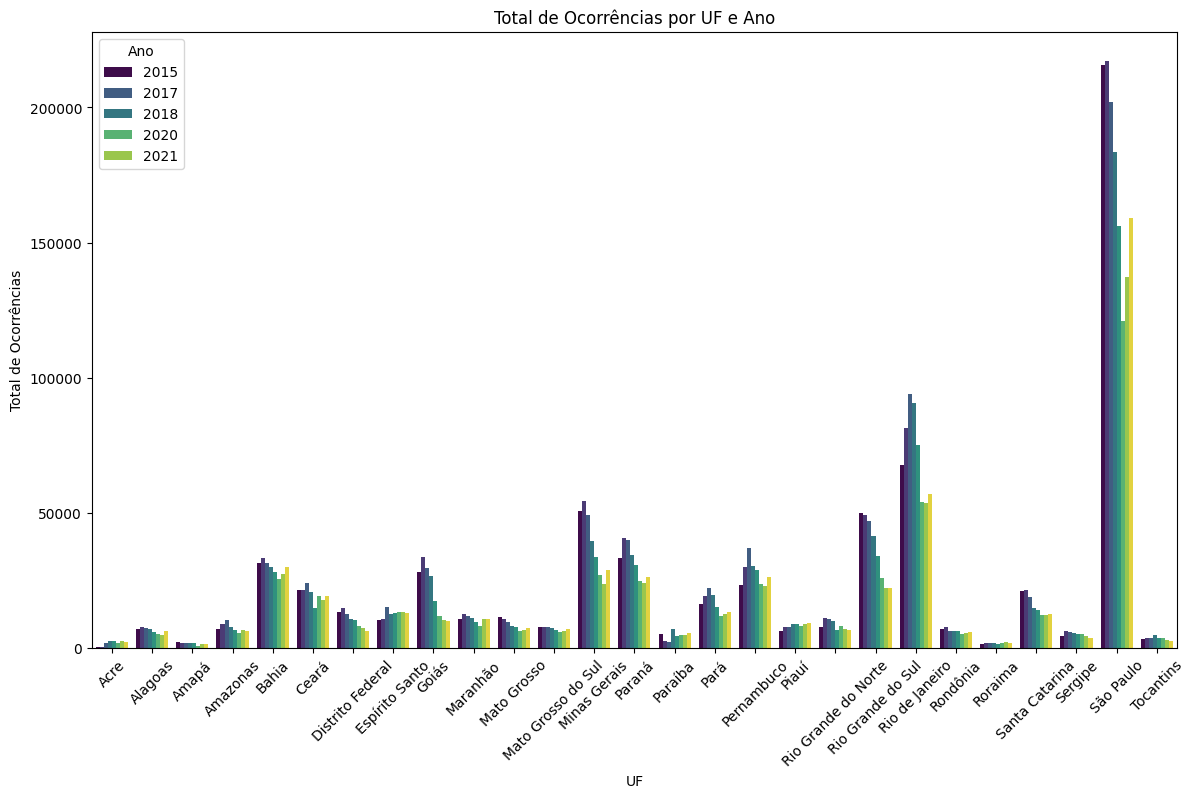

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converter para pandas DataFrame
df_vitimas_pd = df_vitimas.toPandas()
df_ocorrencias_pd = df_ocorrencias.toPandas()

# Agrupar dados
df_vitimas_grouped = df_vitimas_pd.groupby(["UF", "Ano"])["Vitimas"].sum().reset_index()
df_ocorrencias_grouped = df_ocorrencias_pd.groupby(["UF", "Ano"])["Ocorrencias"].sum().reset_index()

# Gráfico de barras empilhadas - Total de Vítimas por UF e Ano
plt.figure(figsize=(14, 8))
sns.barplot(x="UF", y="Vitimas", hue="Ano", data=df_vitimas_grouped, palette="viridis")
plt.title('Total de Vítimas por UF e Ano')
plt.xlabel('UF')
plt.ylabel('Total de Vítimas')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.show()

# Gráfico de barras empilhadas - Total de Ocorrências por UF e Ano
plt.figure(figsize=(14, 8))
sns.barplot(x="UF", y="Ocorrencias", hue="Ano", data=df_ocorrencias_grouped, palette="viridis")
plt.title('Total de Ocorrências por UF e Ano')
plt.xlabel('UF')
plt.ylabel('Total de Ocorrências')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.show()



Correlação entre Vítimas e Ocorrências

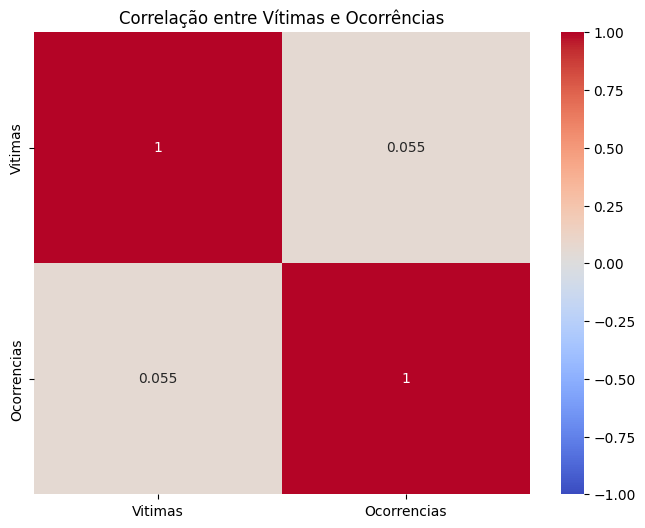

In [ ]:
# Unir os dataframes para criar um gráfico de calor
df_combined = df_vitimas_pd.merge(df_ocorrencias_pd, on=["UF", "Ano", "Mês"])

# Calcular a correlação
correlation_matrix = df_combined[["Vitimas", "Ocorrencias"]].corr()

# Gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlação entre Vítimas e Ocorrências')
plt.show()

Comparativo de Vítimas e Ocorrências por Tipo de Crime

<ipython-input-26-208945b46029>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Vítimas', y='Tipo Crime', data=crimes_vitimas, ax=axes[0], palette='viridis')
<ipython-input-26-208945b46029>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Ocorrências', y='Tipo Crime', data=crimes_ocorrencias, ax=axes[1], palette='viridis')


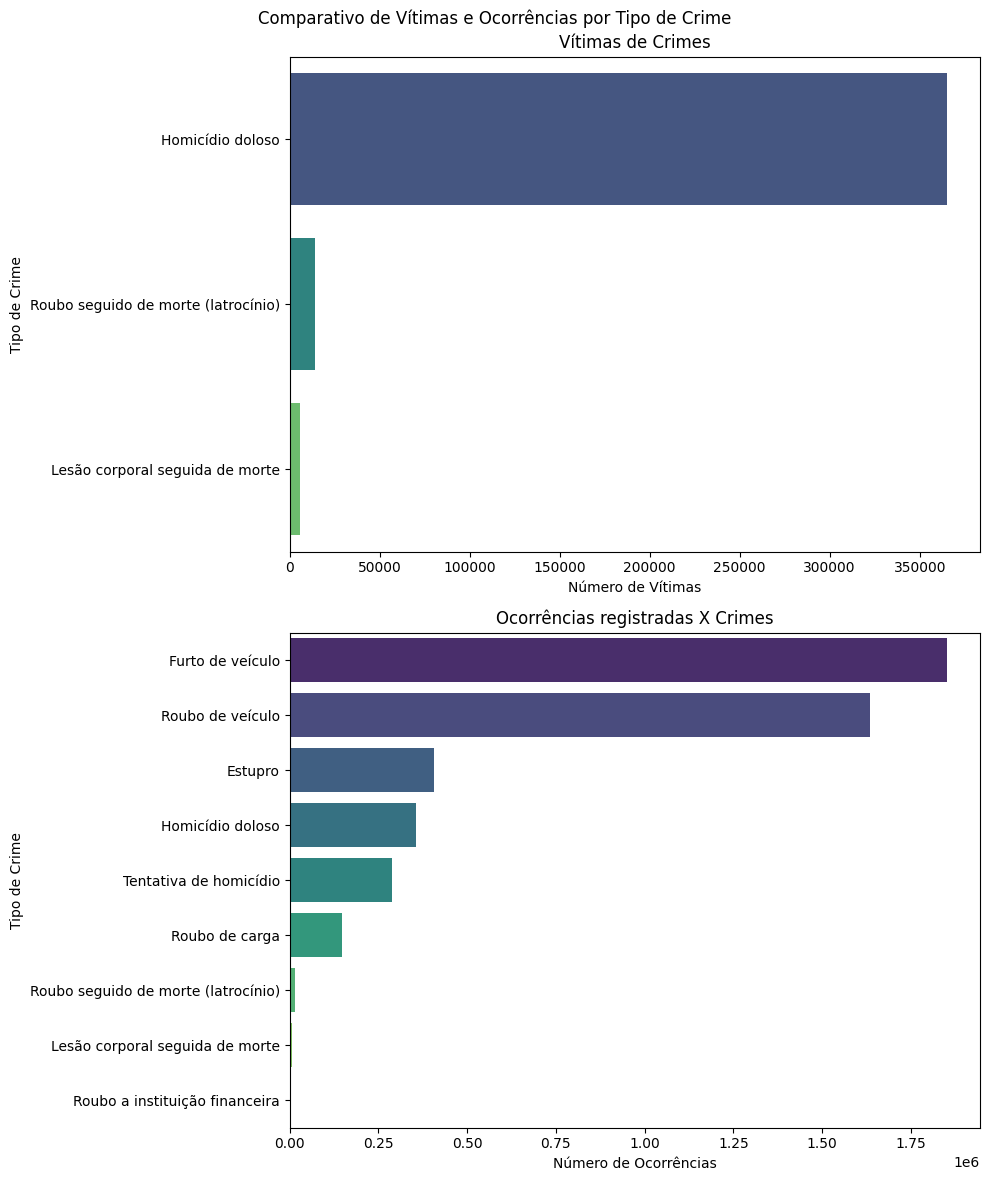

In [ ]:
# Calcula o número de vítimas por tipo de crime
crimes_vitimas = df_vitimas.groupBy("Tipo Crime").agg(sum("Vitimas").alias("Total Vítimas")).orderBy("Total Vítimas", ascending=False).toPandas()

# Calcula o número de ocorrências por tipo de crime
crimes_ocorrencias = df_ocorrencias.groupBy("Tipo Crime").agg(sum("Ocorrencias").alias("Total Ocorrências")).orderBy("Total Ocorrências", ascending=False).toPandas()

# Cria a figura e os subplots usando Matplotlib
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Subplot 1 - Vítimas de Crimes
sns.barplot(x='Total Vítimas', y='Tipo Crime', data=crimes_vitimas, ax=axes[0], palette='viridis')
axes[0].set_title('Vítimas de Crimes')
axes[0].set_xlabel('Número de Vítimas')
axes[0].set_ylabel('Tipo de Crime')

# Subplot 2 - Ocorrências registradas X Crimes
sns.barplot(x='Total Ocorrências', y='Tipo Crime', data=crimes_ocorrencias, ax=axes[1], palette='viridis')
axes[1].set_title('Ocorrências registradas X Crimes')
axes[1].set_xlabel('Número de Ocorrências')
axes[1].set_ylabel('Tipo de Crime')

# Título principal
plt.suptitle('Comparativo de Vítimas e Ocorrências por Tipo de Crime')

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

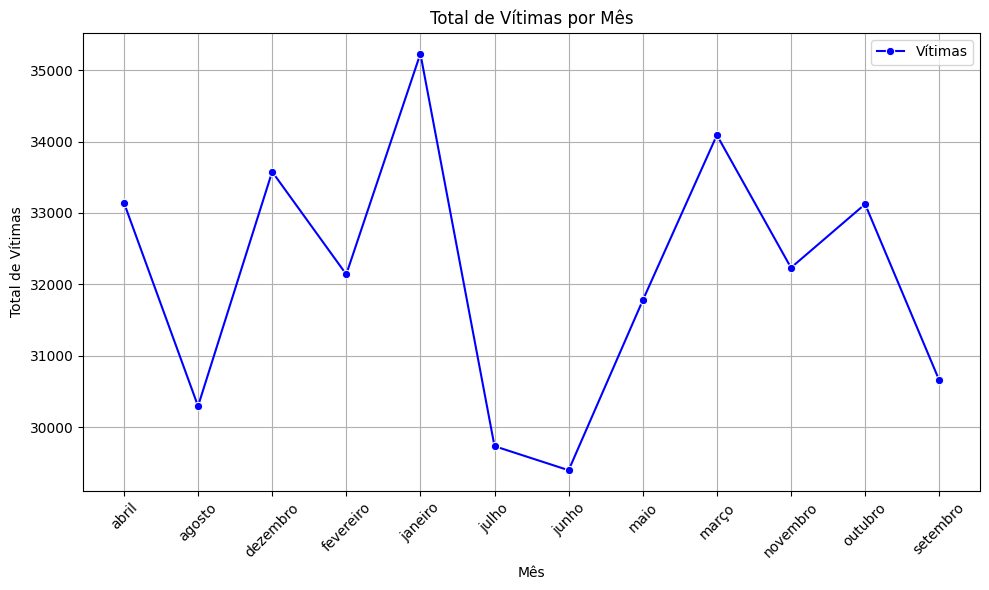

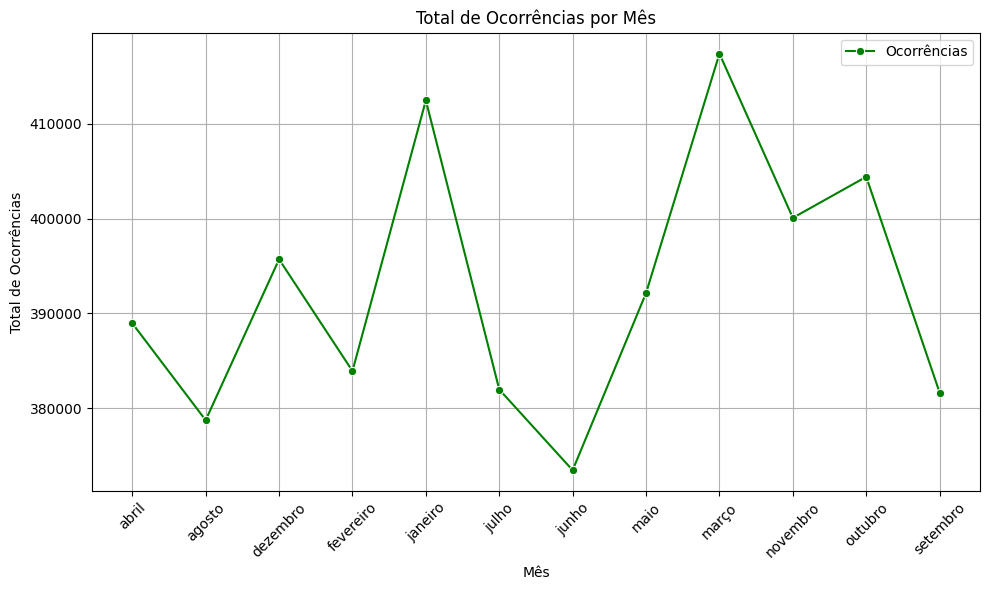

In [ ]:
# Somatório de vítimas e ocorrências por Mês
df_vitimas_grouped = df_vitimas.groupBy("Mês").agg(sum("Vitimas").alias("Total Vítimas")).orderBy("Mês")
df_ocorrencias_grouped = df_ocorrencias.groupBy("Mês").agg(sum("Ocorrencias").alias("Total Ocorrências")).orderBy("Mês")

# Convertendo para Pandas DataFrame para plotagem
df_vitimas_grouped_pd = df_vitimas_grouped.toPandas()
df_ocorrencias_grouped_pd = df_ocorrencias_grouped.toPandas()

# Gráfico de linhas - Total de Vítimas por Mês
plt.figure(figsize=(10, 6))
sns.lineplot(x="Mês", y="Total Vítimas", data=df_vitimas_grouped_pd, marker='o', label='Vítimas', color='blue')
plt.title('Total de Vítimas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vítimas')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de linhas - Total de Ocorrências por Mês
plt.figure(figsize=(10, 6))
sns.lineplot(x="Mês", y="Total Ocorrências", data=df_ocorrencias_grouped_pd, marker='o', label='Ocorrências', color='green')
plt.title('Total de Ocorrências por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Ocorrências')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

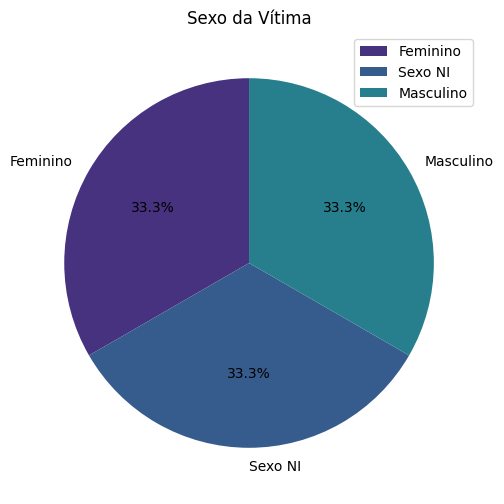

In [ ]:
vitimas_por_sexo = df_vitimas.groupBy("Sexo da Vítima").agg(sum("Vitimas").alias("Total Vítimas")).orderBy("Sexo da Vítima")

# Calcula a contagem de tipos de sexo em df_vitimas
tipos_sexo = vitimas_por_sexo.groupBy("Sexo da Vítima").count().toPandas()
sns.set_palette("viridis")

# Cria o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(tipos_sexo['count'], labels=tipos_sexo['Sexo da Vítima'], autopct='%1.1f%%', startangle=90)
plt.legend(tipos_sexo['Sexo da Vítima'], bbox_to_anchor=(1, 1))
plt.title('Sexo da Vítima')
plt.show()


In [ ]:
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StringType, StructType, StructField

# Criando o DataFrame com o mapeamento das regiões
data = [("Acre", "Norte"), ("Amapá", "Norte"), ("Amazonas", "Norte"), ("Pará", "Norte"),
        ("Rondônia", "Norte"), ("Roraima", "Norte"), ("Tocantins", "Norte"),
        ("Alagoas", "Nordeste"), ("Bahia", "Nordeste"), ("Ceará", "Nordeste"), ("Maranhão", "Nordeste"),
        ("Paraíba", "Nordeste"), ("Pernambuco", "Nordeste"), ("Piauí", "Nordeste"), ("Rio Grande do Norte", "Nordeste"),
        ("Sergipe", "Nordeste"), ("Distrito Federal", "Centro-Oeste"), ("Goiás", "Centro-Oeste"),
        ("Mato Grosso", "Centro-Oeste"), ("Mato Grosso do Sul", "Centro-Oeste"),
        ("Espírito Santo", "Sudeste"), ("Minas Gerais", "Sudeste"), ("Rio de Janeiro", "Sudeste"), ("São Paulo", "Sudeste"),
        ("Paraná", "Sul"), ("Rio Grande do Sul", "Sul"), ("Santa Catarina", "Sul")]

schema = StructType([
    StructField("UF", StringType(), True),
    StructField("Região", StringType(), True)
])

df_mapeamento_regioes = spark.createDataFrame(data, schema)

# Função que faz o mapeamento das regiões
#@pandas_udf(df_mapeamento_regioes.schema, PandasUDFType.MAP_ITER)
def map_regioes(iterator):
    for pdf in iterator:
        yield pdf
# Aplicando a função map_regioes utilizando mapInPandas
df_regiao = df_mapeamento_regioes.mapInPandas(map_regioes, df_mapeamento_regioes.schema)

# Adicionar a coluna "Região" ao df_ocorrencias
df_ocorrencias = df_ocorrencias.join(df_regiao, on="UF", how="left")

# Adicionar a coluna "Região" ao df_vitimas
df_vitimas = df_vitimas.join(df_regiao, on="UF", how="left")

<ipython-input-30-04c1ee8d7a34>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Região", y="Total Ocorrências", data=ocorrencias_por_regiao_ocorrencia, palette='viridis')
<ipython-input-30-04c1ee8d7a34>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Região", y="Total Vítimas", data=ocorrencias_por_regiao_vitima, palette='viridis')


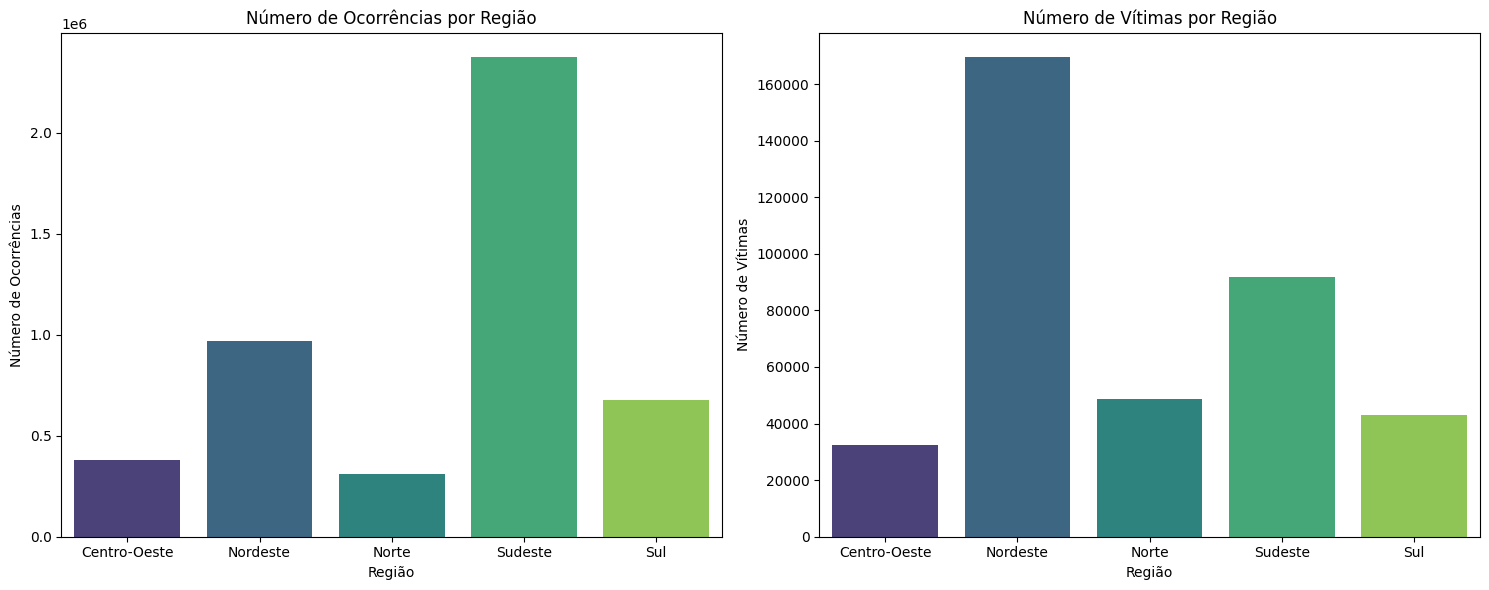

In [ ]:
# Somando o número de ocorrências por região
ocorrencias_por_regiao_ocorrencia = df_ocorrencias.groupBy("Região").agg(sum("Ocorrencias").alias("Total Ocorrências")).orderBy("Região")
ocorrencias_por_regiao_ocorrencia = ocorrencias_por_regiao_ocorrencia.toPandas()

# Somando o número de vítimas por região
ocorrencias_por_regiao_vitima = df_vitimas.groupBy("Região").agg(sum("Vitimas").alias("Total Vítimas")).orderBy("Região")
ocorrencias_por_regiao_vitima = ocorrencias_por_regiao_vitima.toPandas()

# Plotando gráfico agrupado por regiões
plt.figure(figsize=(15, 6))

# Gráfico de barras agrupado por região - Ocorrências
plt.subplot(1, 2, 1)
sns.barplot(x="Região", y="Total Ocorrências", data=ocorrencias_por_regiao_ocorrencia, palette='viridis')
plt.title('Número de Ocorrências por Região')
plt.xlabel('Região')
plt.ylabel('Número de Ocorrências')

# Gráfico de barras agrupado por região - Vítimas
plt.subplot(1, 2, 2)
sns.barplot(x="Região", y="Total Vítimas", data=ocorrencias_por_regiao_vitima, palette='viridis')
plt.title('Número de Vítimas por Região')
plt.xlabel('Região')
plt.ylabel('Número de Vítimas')

# Ajuste do layout para evitar sobreposição
plt.tight_layout()
plt.show()

<ipython-input-31-66cd5b4dfd17>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ano", y="Total Vítimas", data=vitimas_por_ano_pd, palette='viridis')
<ipython-input-31-66cd5b4dfd17>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ano", y="Total Ocorrências", data=ocorrencias_por_ano_pd, palette='viridis')


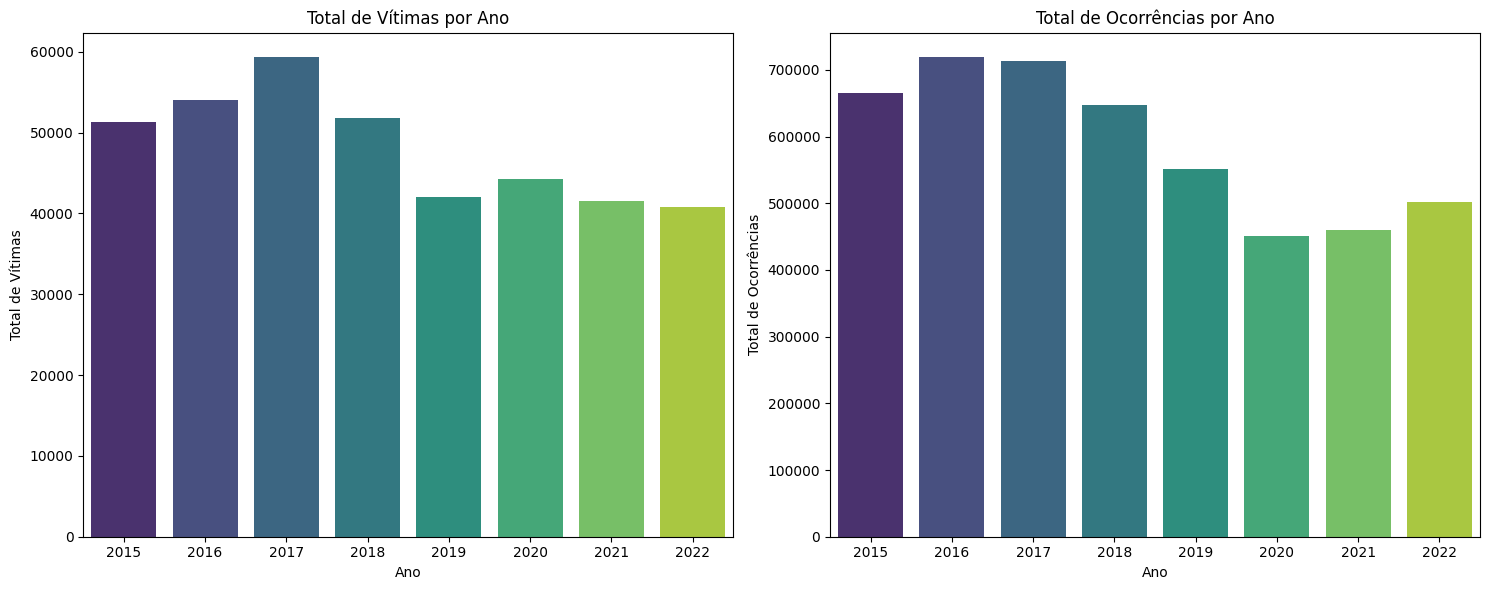

In [ ]:
vitimas_por_ano = df_vitimas.groupBy("Ano").agg(sum("Vitimas").alias("Total Vítimas")).orderBy("Ano")
ocorrencias_por_ano = df_ocorrencias.groupBy("Ano").agg(sum("Ocorrencias").alias("Total Ocorrências")).orderBy("Ano")

# Convertendo para Pandas DataFrame para plotagem
vitimas_por_ano_pd = vitimas_por_ano.toPandas()
ocorrencias_por_ano_pd = ocorrencias_por_ano.toPandas()

# Plotando gráfico com subplot
plt.figure(figsize=(15, 6))

# Subplot 1 - Total de Vítimas por Ano
plt.subplot(1, 2, 1)
sns.barplot(x="Ano", y="Total Vítimas", data=vitimas_por_ano_pd, palette='viridis')
plt.title('Total de Vítimas por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Vítimas')

# Subplot 2 - Total de Ocorrências por Ano
plt.subplot(1, 2, 2)
sns.barplot(x="Ano", y="Total Ocorrências", data=ocorrencias_por_ano_pd, palette='viridis')
plt.title('Total de Ocorrências por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Ocorrências')

# Ajuste do layout para evitar sobreposição
plt.tight_layout()
plt.show()


<ipython-input-32-8a266c19ccb0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="UF", y="Total Vítimas", data=top_5_vitimas, palette="viridis")
<ipython-input-32-8a266c19ccb0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x="UF", y="Total Ocorrências", data=top_5_ocorrencias, palette="viridis")


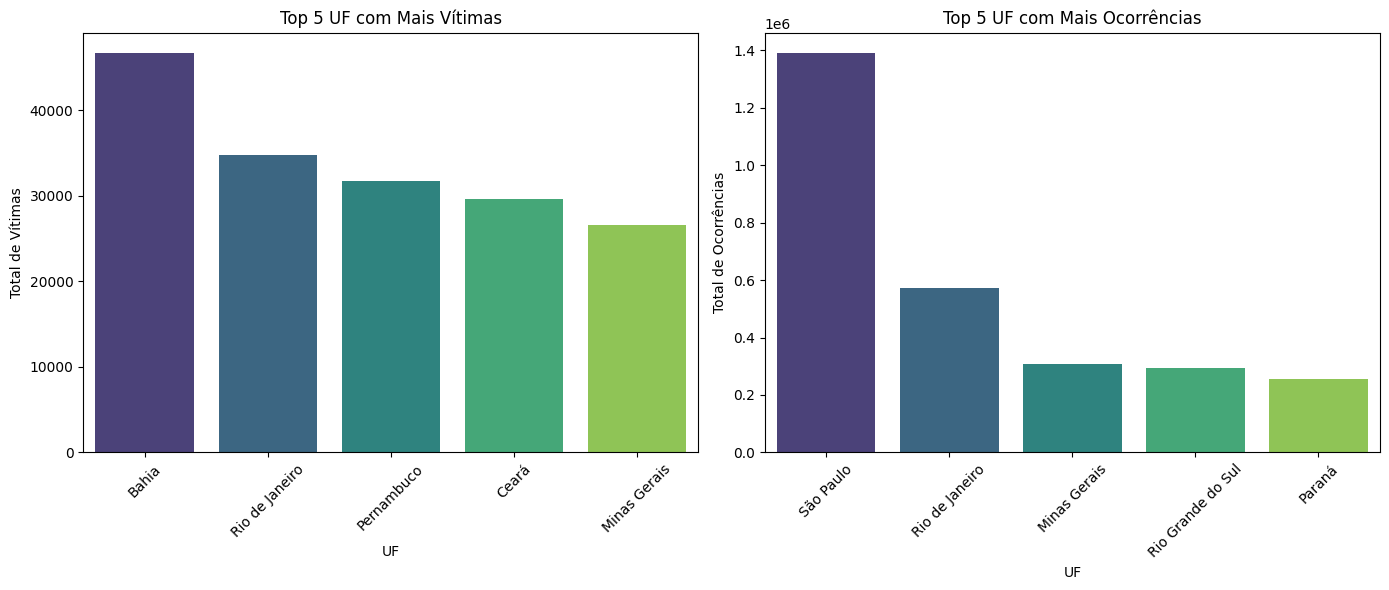

In [ ]:
# Somatório de vítimas e ocorrências por UF
df_vitimas_grouped = df_vitimas.groupBy("UF").agg(sum("Vitimas").alias("Total Vítimas")).orderBy("Total Vítimas", ascending=False)
df_ocorrencias_grouped = df_ocorrencias.groupBy("UF").agg(sum("Ocorrencias").alias("Total Ocorrências")).orderBy("Total Ocorrências", ascending=False)

# Selecionando as top 5 UF com mais vítimas e ocorrências
top_5_vitimas = df_vitimas_grouped.limit(5).toPandas()
top_5_ocorrencias = df_ocorrencias_grouped.limit(5).toPandas()

# Configurações dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico de barras - Top 5 UF com Mais Vítimas
sns.barplot(ax=axes[0], x="UF", y="Total Vítimas", data=top_5_vitimas, palette="viridis")
axes[0].set_title('Top 5 UF com Mais Vítimas')
axes[0].set_xlabel('UF')
axes[0].set_ylabel('Total de Vítimas')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras - Top 5 UF com Mais Ocorrências
sns.barplot(ax=axes[1], x="UF", y="Total Ocorrências", data=top_5_ocorrencias, palette="viridis")
axes[1].set_title('Top 5 UF com Mais Ocorrências')
axes[1].set_xlabel('UF')
axes[1].set_ylabel('Total de Ocorrências')
axes[1].tick_params(axis='x', rotation=45)

# Ajuste de layout
plt.tight_layout()
plt.show()

Comparativo de Vítimas e Ocorrências por Tipo de Crime em comum

<ipython-input-33-49b645fb46de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Vítimas', y='Tipo Crime', data=crimes_vitimas, ax=axes[0], palette='viridis')
<ipython-input-33-49b645fb46de>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Ocorrências', y='Tipo Crime', data=crimes_ocorrencias, ax=axes[1], palette='viridis')


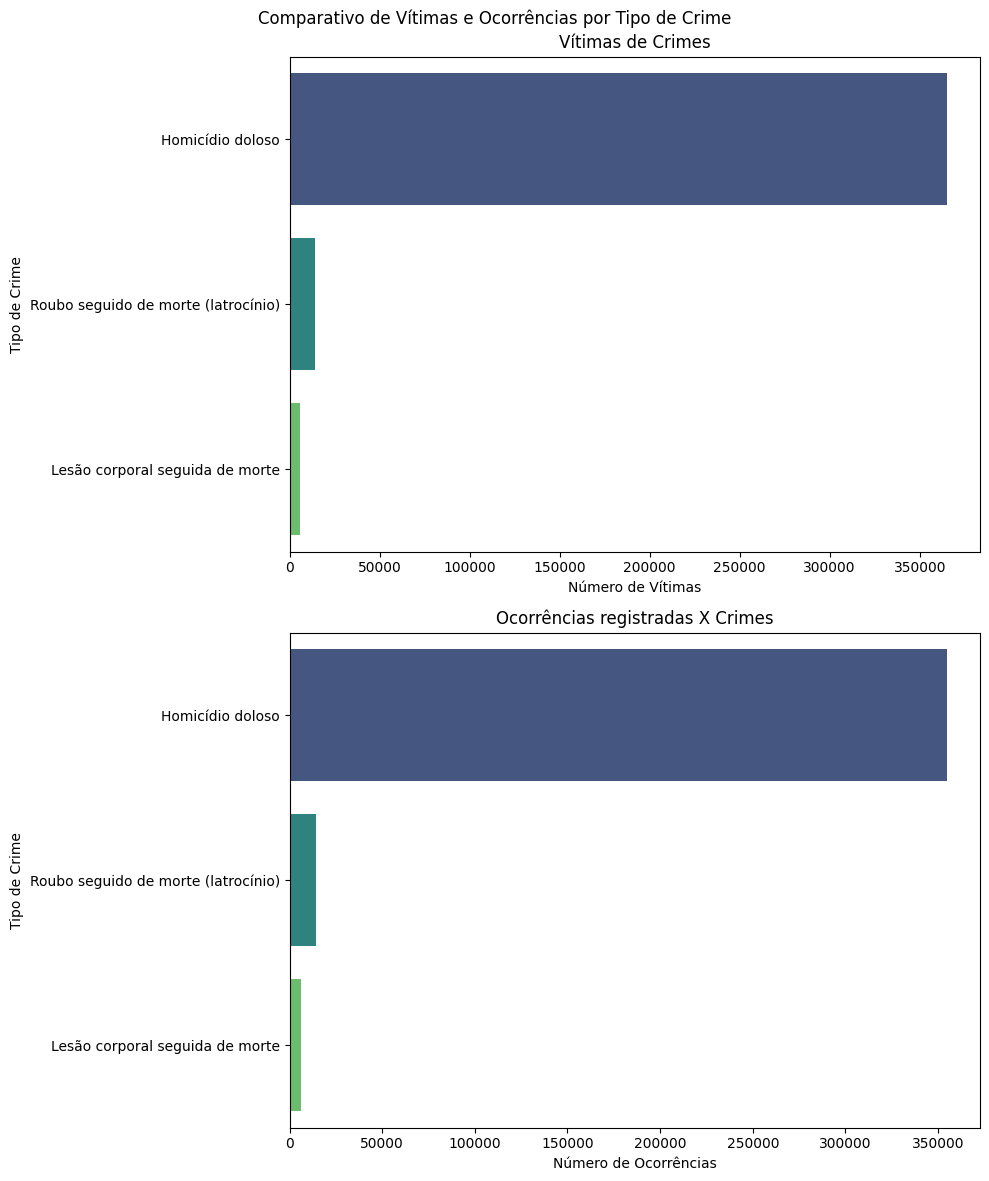

In [ ]:
# Tipos de crime em comum
tipos_crime_comum = ["Homicídio doloso", "Roubo seguido de morte (latrocínio)", "Lesão corporal seguida de morte"]

# Filtrando os dados para os tipos de crime em comum
df_vitimas_filtrado = df_vitimas.filter(df_vitimas["Tipo Crime"].isin(tipos_crime_comum))
df_ocorrencias_filtrado = df_ocorrencias.filter(df_ocorrencias["Tipo Crime"].isin(tipos_crime_comum))

# Calculando o número de vítimas por tipo de crime
crimes_vitimas = df_vitimas_filtrado.groupBy("Tipo Crime").agg(sum("Vitimas").alias("Total Vítimas")).orderBy("Total Vítimas", ascending=False).toPandas()

# Calculando o número de ocorrências por tipo de crime
crimes_ocorrencias = df_ocorrencias_filtrado.groupBy("Tipo Crime").agg(sum("Ocorrencias").alias("Total Ocorrências")).orderBy("Total Ocorrências", ascending=False).toPandas()

# Cria a figura e os subplots usando Matplotlib
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Subplot 1 - Vítimas de Crimes
sns.barplot(x='Total Vítimas', y='Tipo Crime', data=crimes_vitimas, ax=axes[0], palette='viridis')
axes[0].set_title('Vítimas de Crimes')
axes[0].set_xlabel('Número de Vítimas')
axes[0].set_ylabel('Tipo de Crime')

# Subplot 2 - Ocorrências registradas X Crimes
sns.barplot(x='Total Ocorrências', y='Tipo Crime', data=crimes_ocorrencias, ax=axes[1], palette='viridis')
axes[1].set_title('Ocorrências registradas X Crimes')
axes[1].set_xlabel('Número de Ocorrências')
axes[1].set_ylabel('Tipo de Crime')

# Título principal
plt.suptitle('Comparativo de Vítimas e Ocorrências por Tipo de Crime')

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

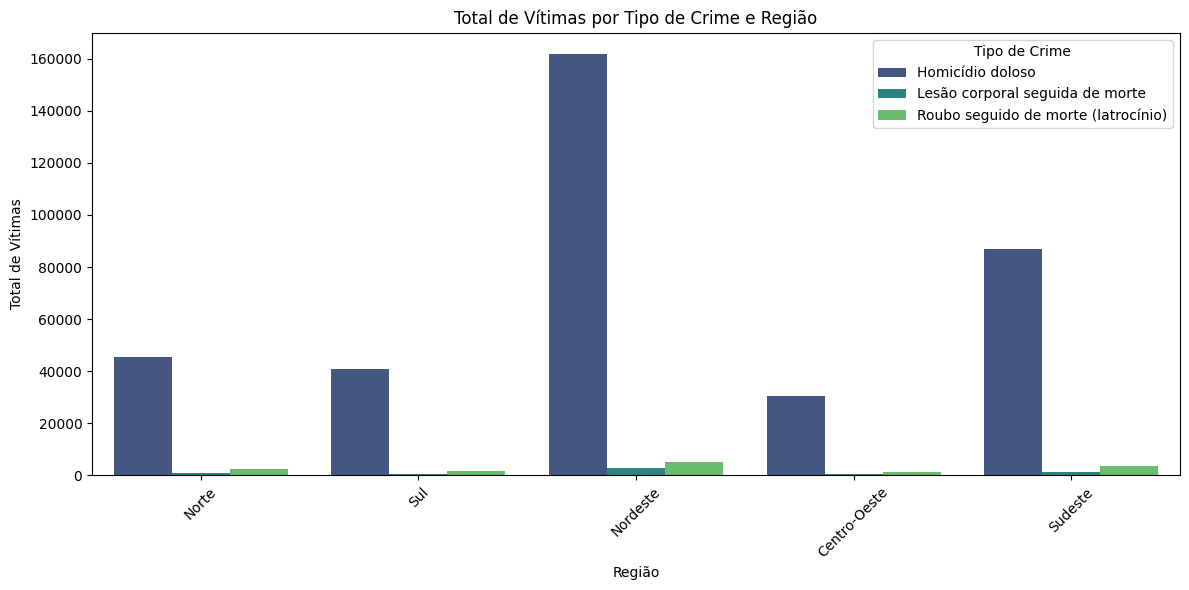

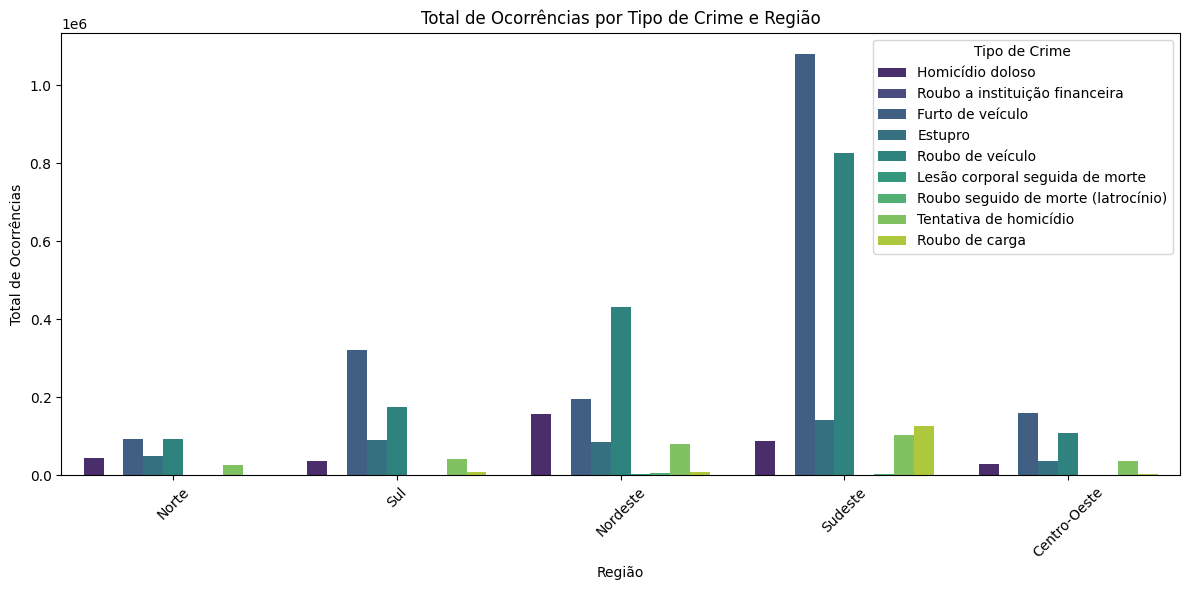

In [ ]:
# Agrupando por região e tipo de crime, somando vítimas e ocorrências
df_vitimas_agrupado = df_vitimas.groupBy("Região", "Tipo Crime").agg(sum("Vitimas").alias("Total Vítimas"))
df_ocorrencias_agrupado = df_ocorrencias.groupBy("Região", "Tipo Crime").agg(sum("Ocorrencias").alias("Total Ocorrências"))

# Convertendo para Pandas para plotagem com Seaborn
df_vitimas_pd = df_vitimas_agrupado.toPandas()
df_ocorrencias_pd = df_ocorrencias_agrupado.toPandas()

# Criando o gráfico de barras - Vítimas por Tipo de Crime e Região
plt.figure(figsize=(12, 6))
sns.barplot(x="Região", y="Total Vítimas", hue="Tipo Crime", data=df_vitimas_pd, palette="viridis")
plt.title('Total de Vítimas por Tipo de Crime e Região')
plt.xlabel('Região')
plt.ylabel('Total de Vítimas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Crime')
plt.tight_layout()
plt.show()

# Criando o gráfico de barras - Ocorrências por Tipo de Crime e Região
plt.figure(figsize=(12, 6))
sns.barplot(x="Região", y="Total Ocorrências", hue="Tipo Crime", data=df_ocorrencias_pd, palette="viridis")
plt.title('Total de Ocorrências por Tipo de Crime e Região')
plt.xlabel('Região')
plt.ylabel('Total de Ocorrências')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Crime')
plt.tight_layout()
plt.show()

In [ ]:
# Finalizar a sessão Spark
spark.stop()